# Unit 5 - Financial Planning


In [14]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [15]:
# Load .env enviroment variables
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_api_key = 'PKN9FQCYMRGT06P3NIA9'
alpaca_secret_key = 'kgi42Lw7k7zkqE9Kv7kL7QvpEU3NIfGjrviipwCY'

## Part 1 - Personal Finance Planner

In [16]:
# Set monthly household income
monthly_household_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [17]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [18]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [19]:
# Fetch current BTC price
btc_price = json.loads(requests.get(btc_url).content.decode('utf-8'))
btc_price = btc_price['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_price = json.loads(requests.get(eth_url).content.decode('utf-8'))
eth_price = eth_price['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = 1.2 * btc_price
my_eth_value = 1.2 * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $14088.44
The current value of your 5.3 ETH is $455.66


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [21]:
# Set Alpaca API key and secret
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, 'https://paper-api.alpaca.markets', api_version="v2")


In [22]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
tickers, timeframe, limit=1).df

# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.787
Current SPY closing price: $342.02


In [23]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17101.00
The current value of your 200 AGG shares is $23557.40


### Savings Health Analysis

In [24]:
# Create savings DataFrame
data = {'amount': [my_btc_value, my_eth_value], 'crypto': ['btc', 'eth'], 'shares': [my_btc, my_eth]}
df_savings = pd.DataFrame(data=data)
df_savings.set_index(['crypto', 'shares'], inplace=True)
# Display savings DataFrame
display(df_savings)

,,amount
crypto,shares,
btc,1.2,14088.444
eth,5.3,455.664


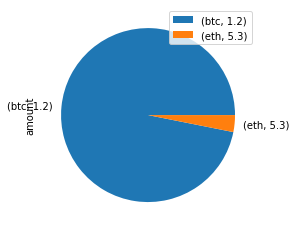

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [29]:
# Set ideal emergency fund
monthly_income = 1000
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = int(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough $ in emergency fund')
elif total_savings >= emergency_fund:
    print('Congrats you have enough $')
elif total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} away from reaching goal")

Congratulations! You have enough $ in emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [30]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(['SPY', 'AGG'], timeframe, start=start_date, end=end_date).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [32]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
agg_daily_returns = df_stock_data['AGG'].pct_change()
spy_daily_returns = df_stock_data['SPY'].pct_change()
agg_avg_daily_return = agg_daily_returns.mean()
spy_avg_daily_return = spy_daily_returns.mean()

agg_std_dev_daily_return = agg_daily_returns.std()
spy_std_dev_daily_return = spy_daily_returns.std()

num_trading_days = 252

agg_last_price = df_stock_data['AGG']['close'][-1]
spy_last_price = df_stock_data['SPY']['close'][-1]

MC_agg_spy = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [33]:
# Printing the simulation input data
MC_agg_spy.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [34]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_agg_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000426,0.995509,1.000037,0.994059,1.011620,0.999191,0.997731,0.996667,0.998908,0.999812,...,1.010003,1.001262,1.001182,0.999617,1.005511,0.994562,1.004744,0.994131,1.008973,0.988312
2,0.996816,0.990859,1.004562,0.987947,1.008314,0.992118,1.003551,0.995815,0.996020,1.006994,...,1.008579,1.010854,0.999134,0.991076,1.003112,0.992443,1.010891,0.999697,1.012636,0.987772
3,0.988655,0.980278,1.015060,0.991829,1.009290,0.990761,0.999171,0.999475,0.989494,1.007622,...,1.012615,1.010558,1.003302,0.996388,1.011709,0.989732,1.010267,1.005127,1.018554,0.989050
4,0.978332,0.984493,1.023196,0.995998,1.019531,0.996697,0.998304,0.995526,0.993077,1.002953,...,1.013677,1.014239,1.006870,0.990801,1.002413,1.001495,1.012480,1.015722,1.016292,0.985870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.866464,2.213476,6.364931,2.786490,4.127329,6.062370,4.492470,4.742537,6.360786,3.843756,...,5.008300,7.155824,12.006151,1.415702,9.855430,8.484495,9.192782,6.711838,4.552019,6.213852
7557,8.798790,2.211825,6.459672,2.773154,4.144206,6.046471,4.523456,4.687687,6.398524,3.815645,...,4.983523,7.120470,12.095576,1.411258,9.875514,8.634691,9.198209,6.706268,4.534378,6.208150
7558,8.845543,2.218654,6.487467,2.770111,4.152601,6.041705,4.540433,4.729214,6.381594,3.839203,...,4.988311,7.117278,12.077885,1.409827,9.810455,8.605219,9.155785,6.716475,4.540102,6.216997
7559,8.846100,2.223221,6.450987,2.795691,4.139920,5.975426,4.564002,4.706767,6.403273,3.822917,...,5.004932,7.175813,12.046182,1.415182,9.777175,8.685769,9.224381,6.738234,4.534457,6.182763


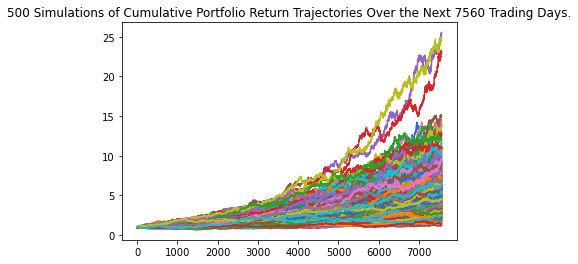

In [35]:
# Plot simulation outcomes
spy_agg_line_plot = MC_agg_spy.plot_simulation()

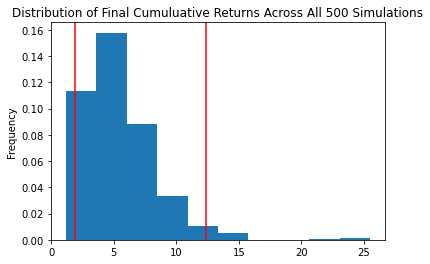

In [36]:
# Plot probability distribution and confidence intervals
dist_plot = MC_agg_spy.plot_distribution()

### Retirement Analysis

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_agg_spy.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.547005
std               2.930077
min               1.165945
25%               3.448770
50%               5.057852
75%               6.759326
max              25.509308
95% CI Lower      1.902462
95% CI Upper     12.361635
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $38049.24 and $247232.7


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [39]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $57073.87 and $370849.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_five)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_ten)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")